In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: punsath
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.22MB/s]

In [4]:
data = pd.read_csv("random-linear-regression/test.csv")

In [6]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
data.shape

(300, 2)

In [9]:
X = data["x"]
y = data["y"]

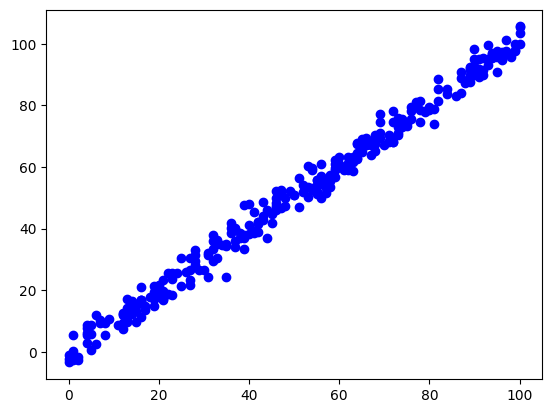

In [10]:
plt.scatter(X, y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((240,), (60,))

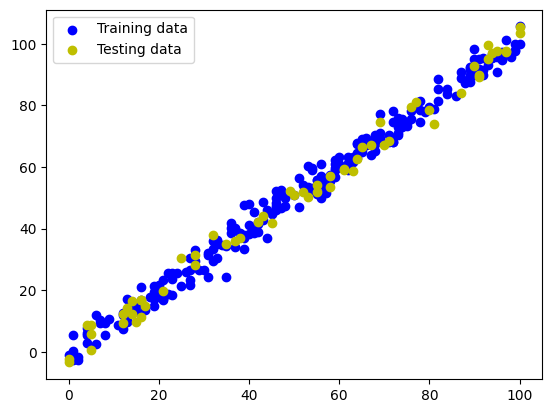

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

Model Building


In [14]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 [==============================] - 1s 3ms/step - loss: 5.5907 - mae: 5.5907
Epoch 2/4
8/8 [==============================] - 0s 2ms/step - loss: 2.9781 - mae: 2.9781
Epoch 3/4
8/8 [==============================] - 0s 2ms/step - loss: 2.9187 - mae: 2.9187
Epoch 4/4
8/8 [==============================] - 0s 2ms/step - loss: 2.6547 - mae: 2.6547


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
y_predictions = model.predict(X_test)
y_predictions [:5]

2/2 [==============================] - 0s 5ms/step


array([[90.629395 ],
       [76.55941  ],
       [94.64938  ],
       [ 5.2045183],
       [91.6344   ]], dtype=float32)

In [20]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

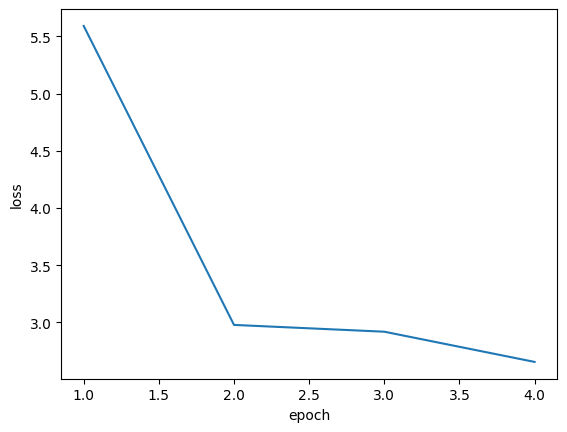

In [21]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model Weights and Baises


In [22]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 0.14879522 -0.43500847 -0.77473086  0.00275552]] 
Biases:
 [ 0.04836083 -0.04874928 -0.05012965 -0.05694683]

Weights:
 [[ 0.561722  ]
 [-0.6089886 ]
 [-0.84905285]
 [-0.46657753]] 
Biases:
 [0.05354021]
